In [1]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn import datasets
import csv

import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

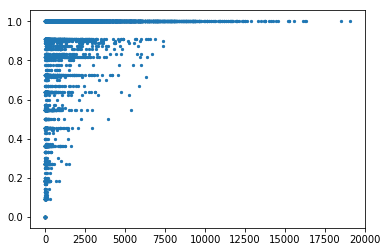

In [5]:
with open('../data/credit_card_dataset.csv', 'r') as f:
    reader = csv.reader(f)
    credit_card_dataset = list(reader)

del credit_card_dataset[0]

credit_card_dataset = [[float(numStr) if numStr else 0 for numStr in sublist[1:]] for sublist in credit_card_dataset]
credit_card_dataset = np.array(credit_card_dataset)

ClusterUtils.visualize_sample_data(credit_card_dataset)
X = credit_card_dataset

### Test with Parallel Runs

In [18]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['GaussianMixture'], 
                                       dim_reduction_alg_ls=['TSNE'],
                                       n_evaluations=50, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * silhouette_score(X, y_pred)  
#                                                    else davies_bouldin_score(X, y_pred)
                                      )

Configuration space object:
  Hyperparameters:
    clustering_choice, Type: Categorical, Choices: {GaussianMixture}, Default: GaussianMixture
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    dim_reduction_choice, Type: Categorical, Choices: {TSNE}, Default: TSNE
    init_params___GaussianMixture, Type: Categorical, Choices: {kmeans, random}, Default: kmeans
    n_components___GaussianMixture, Type: UniformInteger, Range: [1, 20], Default: 5
    n_components___TSNE, Type: Ordinal, Sequence: {2, 3}, Default: 2
    perplexity___TSNE, Type: UniformFloat, Range: [5.0, 50.0], Default: 30.0
    warm_start___GaussianMixture, Type: Categorical, Choices: {True, False}, Default: False
  Conditions:
    covariance_type___GaussianMixture | clustering_choice in {'GaussianMixture'}
    init_params___GaussianMixture | clustering_choice in {'GaussianMixture'}
    n_components___GaussianMixture | clustering_choice in {'GaussianMixture'}


Fitting configuration: {'n_components___TSNE': 3, 'covariance_type___GaussianMixture': 'tied', 'dim_reduction_choice': 'TSNE', 'clustering_choice': 'GaussianMixture', 'perplexity___TSNE': 32.49850308207114, 'init_params___GaussianMixture': 'kmeans', 'n_components___GaussianMixture': 3}
Fitting configuration: {'n_components___TSNE': 3, 'warm_start___GaussianMixture': True, 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'TSNE', 'clustering_choice': 'GaussianMixture', 'perplexity___TSNE': 30.97845277009681, 'init_params___GaussianMixture': 'kmeans', 'n_components___GaussianMixture': 2}
Fitting configuration: {'n_components___TSNE': 3, 'covariance_type___GaussianMixture': 'spherical', 'dim_reduction_choice': 'TSNE', 'clustering_choice': 'GaussianMixture', 'perplexity___TSNE': 26.226962495590296, 'init_params___GaussianMixture': 'random', 'n_components___GaussianMixture': 20}
Fitting configuration: {'n_components___TSNE': 3, 'covariance_type___GaussianMixture': 'full',

In [19]:
opt_result

Configuration:
  clustering_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'tied'
  dim_reduction_choice, Value: 'TSNE'
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 9
  n_components___TSNE, Value: 2
  perplexity___TSNE, Value: 29.840678025139056
  warm_start___GaussianMixture, Value: False

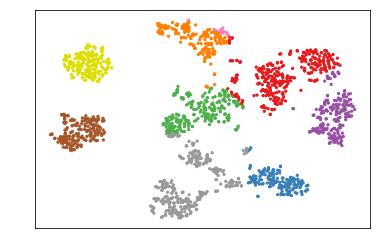

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [23]:
predictions = autocluster.predict(X)
np.unique(predictions)

In [25]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'TSNE'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   n_components___TSNE, Value: 2
   perplexity___TSNE, Value: 30.0
   warm_start___GaussianMixture, Value: False
 , ta_runs=0, ta_time_used=0, wallclock_time=0.00012493133544921875),
 TrajEntry(train_perf=-0.4494229853153229, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'TSNE'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   n_components___TSNE, Value: 2
   perplexity___TSNE, Value: 30.0
   warm_start___GaussianMixture, Value: False
 , ta_runs=1, ta_time_used=9.839362621307373, wallclock_time=9.848929405212402),


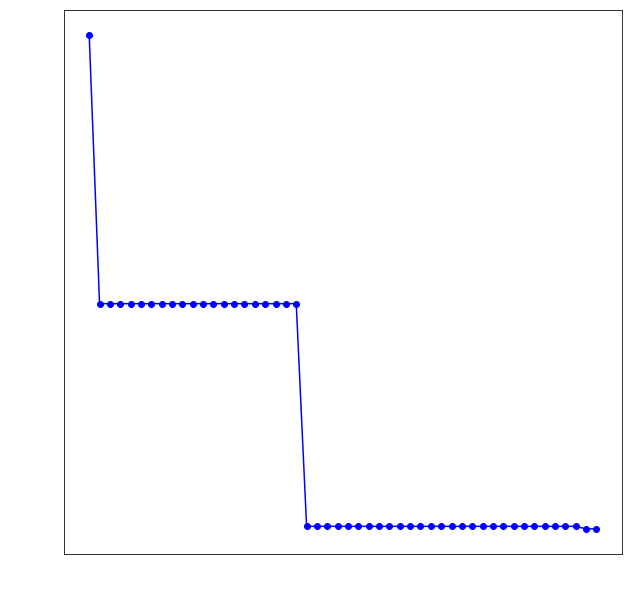

In [26]:
autocluster.plot_convergence()